In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data=pd.read_csv("C:/Users/Varshini/Desktop/advertising data oasis.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
print(data.describe)

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>


C:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


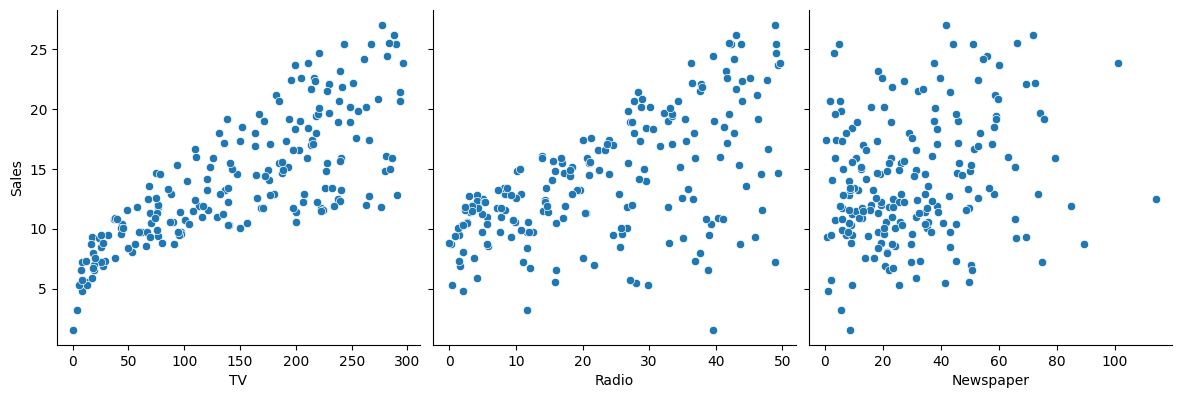

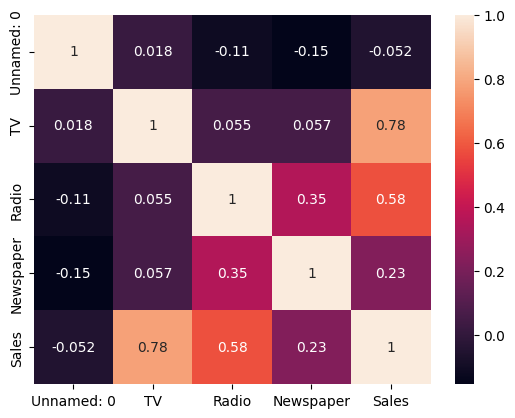

In [6]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

sns.heatmap(data.corr(), annot=True)
plt.show()


In [7]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


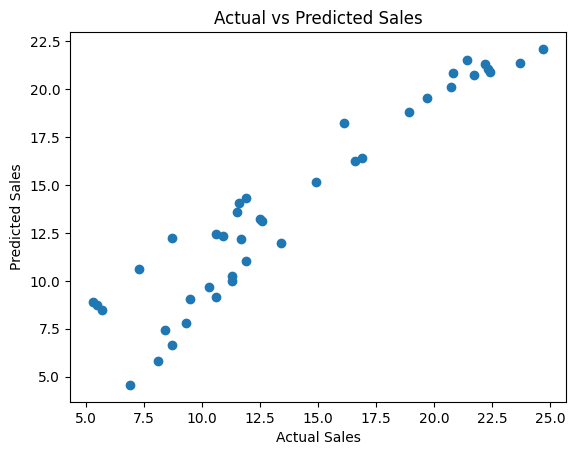

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [11]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train)

In [12]:
# Calculate metrics for training data
mse_train = mean_squared_error(y_train, prediction_on_training_data)
r2_train = r2_score(y_train, prediction_on_training_data)
print(f'Training Data - Mean Squared Error: {mse_train}')
print(f'Training Data - R-squared: {r2_train}')

Training Data - Mean Squared Error: 2.705129423081414
Training Data - R-squared: 0.8957008271017818


In [13]:
# Prediction on testing data
prediction_on_testing_data = model.predict(X_test)

In [14]:
# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, prediction_on_testing_data)
r2_test = r2_score(y_test, prediction_on_testing_data)
print(f'Testing Data - Mean Squared Error: {mse_test}')
print(f'Testing Data - R-squared: {r2_test}')

Testing Data - Mean Squared Error: 3.1740973539761033
Testing Data - R-squared: 0.899438024100912


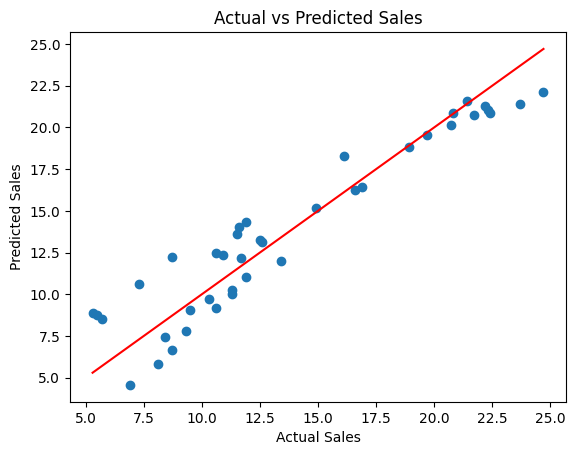

In [15]:
# Visualize the results for testing data
plt.scatter(y_test, prediction_on_testing_data)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line of perfect prediction
plt.show()

In [16]:
def predict_sales(tv, radio, newspaper):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'TV': [tv],
        'Radio': [radio],
        'Newspaper': [newspaper]
    })
    # Make predictions
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage of the predictive system
predicted_sales = predict_sales(200, 30, 40)
print(f'Predicted Sales: {predicted_sales:.2f}')


Predicted Sales: 17.71
